# 주가정보 가져오기

### 주식정보 가져오기

2020-03-23
              Open    High     Low   Close  Volume    Change
Date                                                        
2020-03-17  410000  433000  409500  417500  423614 -0.029070
2020-03-18  425500  427500  400500  400500  276886 -0.040719
2020-03-19  410000  416000  352000  366000  470624 -0.086142
2020-03-20  383500  451000  371500  430000  586738  0.174863
2020-03-23  406000  454500  405500  436000  589740  0.013953


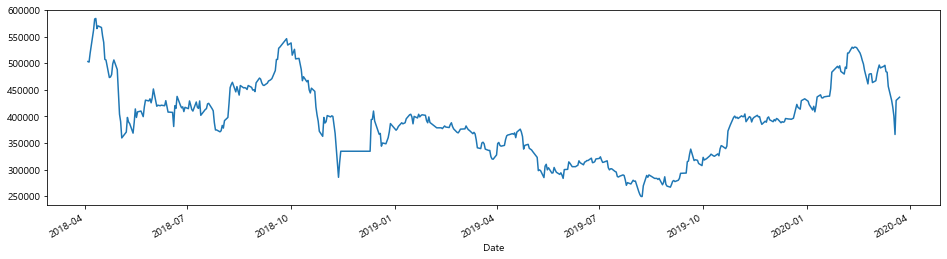

In [1]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)

SEC = web.DataReader("207940", startday, yesterday)
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())
SEC['Close'].plot(figsize=(16,4))
plt.show()

### 2019년도 1분기 주식정보 가져오기

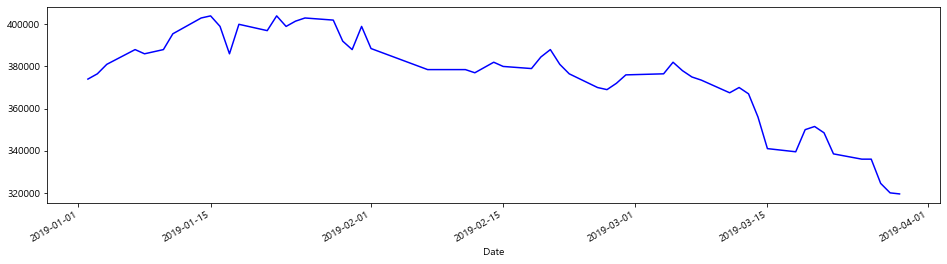

In [3]:
SEC["2019-01-01":"2019-03-31"]['Close'].plot(figsize=(16,4), style='b')
plt.show()

### 2019년도 1분기 거래량 정보 가져오기

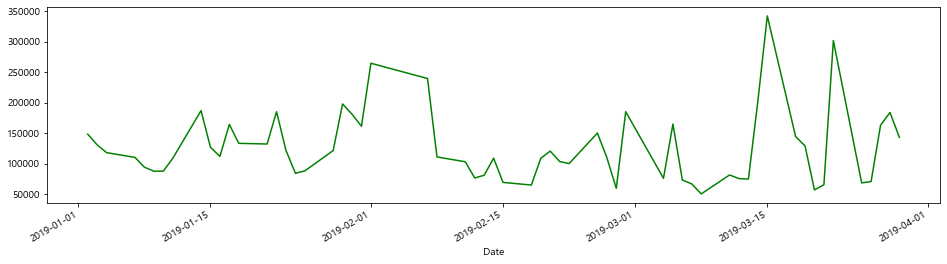

In [4]:
SEC["2019-01-01":"2019-03-31"]["Volume"].plot(figsize=(16,4), style='g')
plt.show()


### 수익률 계산 및 변동 계산

In [6]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline
plt.figure(figsize=(15,9))
today = date.today()
startday = date(2018,4,1)
endday = date(2018,6,27)
SEC = web.DataReader("207940", startday, endday)
SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()
# 수익률 계산
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))
SEC.head()

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2018-04-02,487000,490000,482500,486000,91013,-0.002053,NaN
2018-04-03,484000,489500,480000,485500,127515,-0.001029,-0.001029
2018-04-04,490000,505000,486000,503000,305367,0.036045,0.035411
2018-04-05,501000,505000,496500,502000,193001,-0.001988,-0.001990
2018-04-06,509000,534000,508000,519000,294164,0.033865,0.033304


<Figure size 1080x648 with 0 Axes>

### 수익율 계산 및 변동

C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


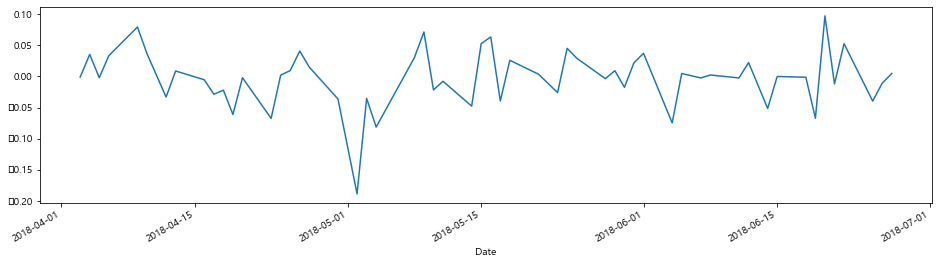

In [8]:
SEC["Rate"].plot(figsize=(16,4))
plt.show()

# 실습1 
# [원하는 종목코드 가져오기]

### 1. 라이브러리 정의

In [9]:
import urllib.parse
import pandas as pd

### 2. 마켓타입 및 URL 정의

In [11]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

### 3. 함수 정의 [종목코드 6자리]

In [13]:
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

### 3. 함수 정의 [파일 다운로드 ] 

In [14]:
def get_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        ## marketType 키 추가
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+" market key is exist")
    else:
        #params['searchType'] = 13
        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url, header=0)[0]
    df["종목코드"] = df.종목코드.apply(zeroFill)

    return df

### 4. 종목코드 가져오기

In [16]:
stocks = get_stock_codes('kospi')
stocks.head(2)

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,005560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시


# 실습2 
# [메도/매수 결정하기]

### 관심종목 정의

In [19]:
stock_code = stocks.iloc[0]['종목코드']
stock_name = stocks.iloc[0]['회사명']
print(stock_name)
print(stock_code)

JS전선
005560


### 1. 라이브러리 정의

In [21]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

### 2. 폰트 세팅 

In [22]:
#font setting for window
#font setting for mac (AppleGothic)
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


Populating the interactive namespace from numpy and matplotlib


C:\Users\kopo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 3. 단기, 장기 이동평균 및 차이 산출

In [24]:
SEC["MA_5"]=SEC["Close"].rolling(window=5).mean()
SEC["MA_20"]=SEC["Close"].rolling(window=20).mean()
SEC["diff"]=SEC["MA_5"]-SEC["MA_20"]
SEC.tail(5)


,Open,High,Low,Close,Volume,Change,Rate,MA_5,MA_20,diff
Date,,,,,,,,,,
2018-06-21,420000,426000,411000,415000,153582,-0.011905,-0.011976,406300.0,419600.0,-13300.0
2018-06-22,419500,445500,415500,437500,345522,0.054217,0.052798,412200.0,421500.0,-9300.0
2018-06-25,438000,438500,418000,420500,165310,-0.038857,-0.039632,414800.0,421625.0,-6825.0
2018-06-26,410000,419000,400500,416000,217564,-0.010702,-0.010759,421800.0,420900.0,900.0
2018-06-27,414500,426500,413000,418000,116211,0.004808,0.004796,421400.0,420350.0,1050.0


### 4. 시각화 분석

C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


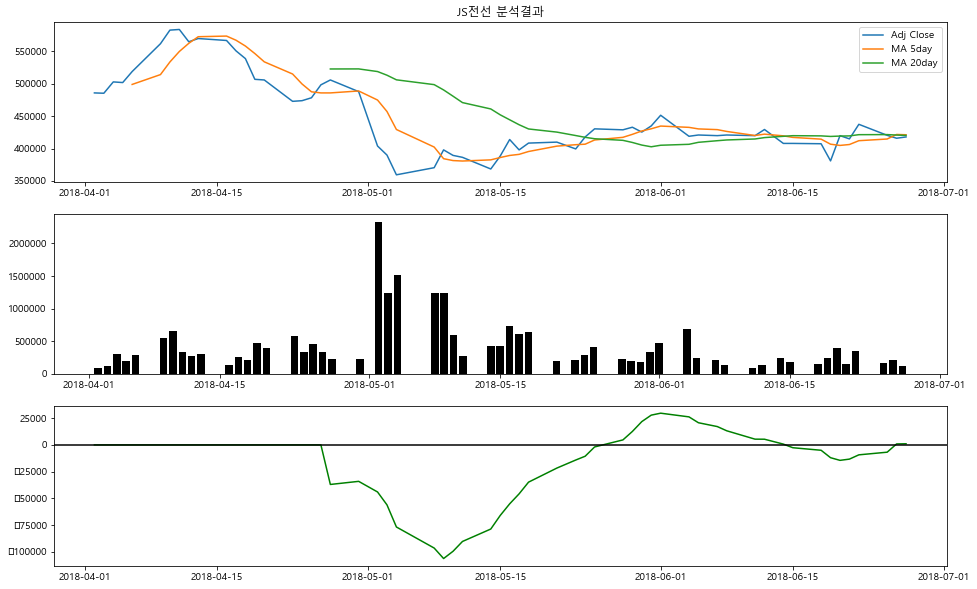

In [25]:
plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Adj Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(stock_name+" 분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')